## Machine Learning Algorithm for Housing Prices

In [245]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [246]:
''' Import cleaned housing data for Kings County, WA. '''
houseClean = pd.read_csv("./data/Modified/houseClean_dates.csv", index_col=False)
houseClean.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter
0,0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,4
4,4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [247]:
X_train_df = houseClean[['bedrooms','sqft_living','grade']]
y_train_df = houseClean['price']
X_train_df.head()

,bedrooms,sqft_living,grade
0,3.0,1180.0,7
1,3.0,2570.0,7
2,2.0,770.0,6
3,4.0,1960.0,7
4,3.0,1680.0,8


In [248]:
''' Define Dependent and Independent Variables '''
# X = houseClean[['bedrooms','sqft_living','grade']] # Independent variables
# y = houseClean['price'].values.reshape(-1,1) # Dependent variables
X = X_train_df.iloc[:, 0:3].values
y = y_train_df.values.reshape(-1,1)
print(X.shape, y.shape)

(21613, 3) (21613, 1)


In [249]:
''' Create Training and Test sets with a 70-30 split '''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 3) (6484, 3) (15129, 1) (6484, 1)


In [275]:
''' Inspect feature training set. '''
X_train

array([[ 0.67689911,  0.66517989,  1.14761535],
       [ 0.67689911,  0.29223284, -0.55665681],
       [ 0.67689911,  0.12769738,  0.29547927],
       ...,
       [-0.41220082,  0.05091417, -0.55665681],
       [-2.59040068, -1.85769717, -2.26092897],
       [ 0.67689911,  1.15878627, -0.55665681]])

In [251]:
''' Inspect feature output training set. '''
y_train

array([[807100.],
       [570000.],
       [320000.],
       ...,
       [575000.],
       [245000.],
       [315000.]])

### Linear Regression Model

In [252]:
''' Linear Regression using Sci-kit Learn '''
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

linreg = LinearRegression()

In [253]:
''' Fit model to training data and calculate scores for the training and test sets '''
linreg.fit(X_train, y_train)
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"Intercept: {linreg.intercept_}")
print(f"Coefficients: {linreg.coef_}")

Training Score: 0.5447804988010514
Test Score: 0.5346784002302889
Intercept: [-456625.2392444]
Coefficients: [[-41061.83765057    215.19728087  89734.75088002]]


Text(0.5, 1.0, 'Residual Plot')

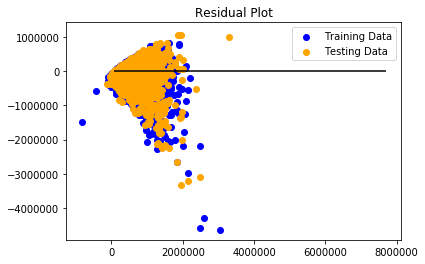

In [254]:
''' Plot the Residuals for the Training and Testing data '''
plt.scatter(linreg.predict(X_train), linreg.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linreg.predict(X_test), linreg.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [255]:
# Make prediction
new_bedroom = 3
new_sqftliving = 2500
new_grade = 6
print(f"Predicted Price of Home: {linreg.predict([[new_bedroom, new_sqftliving, new_grade]])}")

Predicted Price of Home: [[496590.95524863]]


In [256]:
# Add constant
X = sm.add_constant(X)

model_fin = sm.OLS(y, X).fit()
predictions = model_fin.predict(X)

# Model summary
model_summary = model_fin.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     8512.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:27:25   Log-Likelihood:            -2.9917e+05
No. Observations:               21613   AIC:                         5.984e+05
Df Residuals:                   21609   BIC:                         5.984e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.715e+05   1.49e+04    -31.666      0.0

### Linear Regression Using Gradient Descent

In [257]:
''' Building the model: 1) Hypothesis function. '''
def hypothesis(theta, X, n): # theta == target variable; X == features in the matrix; n == number of features
    h = np.ones((X.shape[0], 1))
    theta = theta.reshape(1, n+1)
    for i in range(0, X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [272]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    
    ''' Finding Initial Theta '''
    for i in range(0, num_iters):
        ratio = alpha/len(X)
        hypo_sum = sum(h) - sum(y)
        theta[0] = theta[0] - (ratio * hypo_sum)
        
        ''' Finding Theta_j '''
        for j in range(1, n+1):
            theta[j] = theta[j] - (ratio * hypo_sum * X.transpose()[j])
            print(theta[j])
            
        h = hypothesis(theta, X, n)
        cost[i] = 0
#         cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1, n+1)
    return theta, cost

In [259]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    ''' Initialize parameter vector '''
    theta = np.zeros(n+1)
    ''' Hypothesis calculation '''
    h = hypothesis(theta, X, n)
    ''' Return optimized parameters by Gradient Descent '''
    theta, cost = BGD(theta, alpha, num_iters, h, X, y, n)
    return theta, cost

In [260]:
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])

for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

In [261]:
print(mean, std)

[   3.37847842 2073.5837134     7.65324873] [  0.91818939 911.65758216   1.17352148]


In [273]:
eta = 0.001 # Learning Rate
n_iters = 10 # Number of iterations
theta, cost = linear_regression(X_train, y_train, eta, n_iters)

ValueError: setting an array element with a sequence.

In [ ]:
''' Theta-value after Batch Gradient Descent '''
theta

In [271]:
X_train.transpose()

array([[ 0.67689911,  0.67689911,  0.67689911, ..., -0.41220082,
        -2.59040068,  0.67689911],
       [ 0.66517989,  0.29223284,  0.12769738, ...,  0.05091417,
        -1.85769717,  1.15878627],
       [ 1.14761535, -0.55665681,  0.29547927, ..., -0.55665681,
        -2.26092897, -0.55665681]])

In [ ]:
X_train.shape[1]